In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('pharma_data.csv')
dataset.head()

,product_id,brand_name,manufacturer,price_inr,is_discontinued,dosage_form,pack_size,pack_unit,num_active_ingredients,primary_ingredient,primary_strength,active_ingredients,therapeutic_class,packaging_raw,manufacturer_raw
0,1,Augmentin 625 Duo Tablet,Glaxo SmithKline Pharmaceuticals Ltd,223.42,False,tablet,10.0,strip,2,Amoxycillin,500mg,"[{'name': 'Amoxycillin', 'strength': '500mg', ...",antibiotic,strip of 10 tablets,Glaxo SmithKline Pharmaceuticals Ltd
1,2,Azithral 500 Tablet,Alembic Pharmaceuticals Ltd,132.36,False,tablet,5.0,strip,1,Azithromycin,500mg,"[{'name': 'Azithromycin', 'strength': '500mg',...",antibiotic,strip of 5 tablets,Alembic Pharmaceuticals Ltd
2,3,Ascoril LS Syrup,Glenmark Pharmaceuticals Ltd,118.00,False,syrup,100.0,bottle,2,Ambroxol,30mg/5ml,"[{'name': 'Ambroxol', 'strength': '30mg/5ml', ...",bronchodilator,bottle of 100 ml Syrup,Glenmark Pharmaceuticals Ltd
3,4,Allegra 120mg Tablet,Sanofi India Ltd,218.81,False,tablet,10.0,strip,1,Fexofenadine,120mg,"[{'name': 'Fexofenadine', 'strength': '120mg',...",antihistamine,strip of 10 tablets,Sanofi India Ltd
4,5,Avil 25 Tablet,Sanofi India Ltd,10.96,False,tablet,15.0,strip,1,Pheniramine,25mg,"[{'name': 'Pheniramine', 'strength': '25mg', '...",other,strip of 15 tablets,Sanofi India Ltd


In [4]:
dataset.shape

(253973, 15)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              253973 non-null  int64  
 1   brand_name              253973 non-null  object 
 2   manufacturer            253973 non-null  object 
 3   price_inr               253973 non-null  float64
 4   is_discontinued         253973 non-null  bool   
 5   dosage_form             253973 non-null  object 
 6   pack_size               253973 non-null  float64
 7   pack_unit               253973 non-null  object 
 8   num_active_ingredients  253973 non-null  int64  
 9   primary_ingredient      253973 non-null  object 
 10  primary_strength        253973 non-null  object 
 11  active_ingredients      253973 non-null  object 
 12  therapeutic_class       253973 non-null  object 
 13  packaging_raw           253973 non-null  object 
 14  manufacturer_raw    

In [6]:
dataset.dtypes

product_id                  int64
brand_name                 object
manufacturer               object
price_inr                 float64
is_discontinued              bool
dosage_form                object
pack_size                 float64
pack_unit                  object
num_active_ingredients      int64
primary_ingredient         object
primary_strength           object
active_ingredients         object
therapeutic_class          object
packaging_raw              object
manufacturer_raw           object
dtype: object

In [7]:
# check null values
dataset.isnull().sum()

product_id                0
brand_name                0
manufacturer              0
price_inr                 0
is_discontinued           0
dosage_form               0
pack_size                 0
pack_unit                 0
num_active_ingredients    0
primary_ingredient        0
primary_strength          0
active_ingredients        0
therapeutic_class         0
packaging_raw             0
manufacturer_raw          0
dtype: int64

In [8]:
# check duplicate values
dataset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
253968    False
253969    False
253970    False
253971    False
253972    False
Length: 253973, dtype: bool

### Basic Descriptive Stats

In [11]:
dataset.describe()

,product_id,price_inr,pack_size,num_active_ingredients
count,253973.000000,253973.000000,253973.000000,253973.000000
mean,126987.000000,270.530844,17.319317,1.441893
std,73315.834296,3029.584134,35.475945,0.496795
min,1.000000,0.000000,0.000000,1.000000
25%,63494.000000,48.000000,10.000000,1.000000
50%,126987.000000,79.000000,10.000000,1.000000
75%,190480.000000,140.000000,10.000000,2.000000
max,253973.000000,436000.000000,5000.000000,5.000000


In [12]:
#Top Dosage Forms

In [9]:
dataset['dosage_form'].value_counts().head(1)

dosage_form
tablet    152586
Name: count, dtype: int64

In [10]:
dataset['dosage_form'].value_counts().tail(1)

dosage_form
respules    122
Name: count, dtype: int64

In [11]:
# Top 10 therapeutic classes
dataset['therapeutic_class'].value_counts().head(10)

therapeutic_class
other               144119
antibiotic           30660
analgesic            24105
antacid              17432
antihistamine        13414
antidiabetic          8957
antihypertensive      7324
corticosteroid        2968
antidepressant        2499
bronchodilator        1802
Name: count, dtype: int64

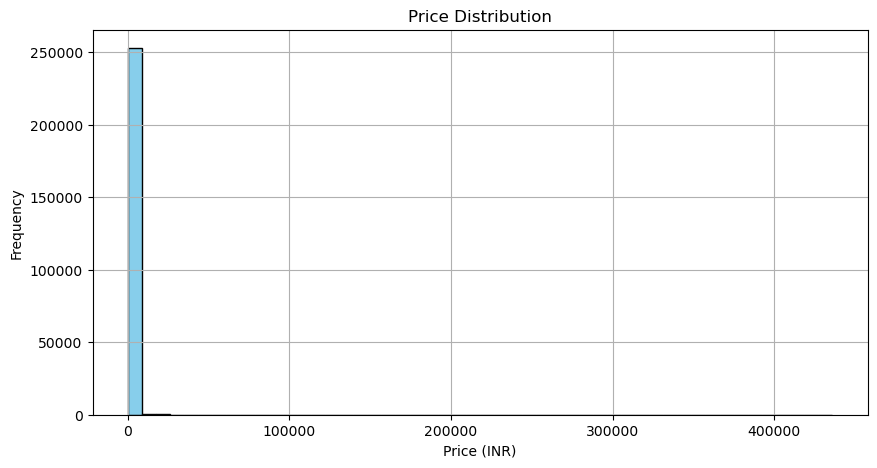

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(dataset['price_inr'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## AVG price by dosage_value

In [13]:
dataset.groupby('dosage_form')['price_inr'].mean().reset_index()

,dosage_form,price_inr
0,capsule,315.301660
1,cream,132.384747
2,drops,89.337565
3,gel,150.467736
4,inhaler,472.815131
5,injection,893.375552
6,ointment,125.009575
7,other,462.836402
8,powder,391.151910
9,respules,156.661967


## Top 10 most expensive products

In [16]:
expensive_product = dataset.sort_values(by ='price_inr', ascending = False)
top_10 = expensive_product.head(10)
top_10[['brand_name','manufacturer','price_inr','dosage_form','pack_unit']]

,brand_name,manufacturer,price_inr,dosage_form,pack_unit
113862,Imbruvica 140mg Capsule,Janssen Pharmaceuticals,436000.0,capsule,units
217021,Tecentriq 1200mg Injection,Roche Products India Pvt Ltd,396725.0,solution,ml
243971,Xtandi 40mg Soft Capsule,Astellas Pharma Inc,335635.0,capsule,units
28711,Besponsa 1mg Injection,Pfizer Ltd,330000.0,injection,ml
113861,Imbruvica 140mg Capsule,Janssen Pharmaceuticals,328000.0,capsule,units
129170,Lorbriqua 100mg Tablet,Pfizer Ltd,312000.0,tablet,units
219482,Tecentriq Injection,Roche Products India Pvt Ltd,277708.0,injection,ml
35994,Cyramza 500mg Injection,Eli Lilly and Company India Pvt Ltd,257532.0,injection,ml
175276,Perjeta 420mg Injection,Roche Products India Pvt Ltd,255150.0,injection,ml
116435,Kadcyla 160mg Injection,Roche Products India Pvt Ltd,248937.0,injection,ml


## Select the data in rows[3,8,4] and in columns brand name and manufacturer 

In [17]:
dataset[['brand_name','manufacturer']].iloc[[3,8,4]] 

,brand_name,manufacturer
3,Allegra 120mg Tablet,Sanofi India Ltd
8,Atarax 25mg Tablet,Dr Reddy's Laboratories Ltd
4,Avil 25 Tablet,Sanofi India Ltd


## Select the rows where manufacturer is NAN

In [22]:
dataset[dataset['manufacturer'] == 'Sanofi India Ltd'].count()

product_id                351
brand_name                351
manufacturer              351
price_inr                 351
is_discontinued           351
dosage_form               351
pack_size                 351
pack_unit                 351
num_active_ingredients    351
primary_ingredient        351
primary_strength          351
active_ingredients        351
therapeutic_class         351
packaging_raw             351
manufacturer_raw          351
dtype: int64